In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import os
from sys import platform
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
from sklearn.model_selection import cross_val_score as cvs

#### load data


In [441]:
df_train = pd.read_csv("./kaggle_data/train.csv")
df_test = pd.read_csv("./kaggle_data/test.csv")

In [443]:
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,9.776


# Create Dict mapping weight of categories  


In [426]:
df_train['clarity'].unique()
clarity_dict= {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}


In [427]:
df_train["clarity"] = df_train.clarity.map(clarity_dict)
df_test["clarity"]= df_test.clarity.map(clarity_dict)

### Now that Clarity is model readable, must make cut and color also readable 


In [428]:

def get_unique_dict(df_col): 
    new_dict= {}
    for i in list(df_col.unique()):
        new_dict[i] = 0
    return new_dict

cut_dict= get_unique_dict(df_test.cut)
cut_dict

{'Ideal': 0, 'Fair': 0, 'Premium': 0, 'Very Good': 0, 'Good': 0}

In [429]:
cut_dict= {'Ideal': 4, 'Fair': 1, 'Premium': 4, 'Very Good': 3, 'Good': 2}

df_train["cut"] = df_train.cut.map(cut_dict)

df_test["cut"] = df_test.cut.map(cut_dict)


### Now, need to map color 

In [430]:
df_train['color'].unique()

array(['D', 'H', 'E', 'G', 'F', 'I', 'J'], dtype=object)

In [431]:
color_dict= {'D': 7, 'H': 3, 'E': 6, 'G': 4, 'F': 5, 'I': 2, 'J': 1}
get_unique_dict(df_train.color)


{'D': 0, 'H': 0, 'E': 0, 'G': 0, 'F': 0, 'I': 0, 'J': 0}

### Apply to both train and test df

In [432]:
df_train["color"] = df_train.color.map(color_dict)

df_test["color"] = df_test.color.map(color_dict)

In [433]:
df_train.drop('id',inplace= True, axis= 1)
df_test.drop('id',inplace= True, axis= 1)

### Carat has outliers and no assumed normality, so must normalize the data 

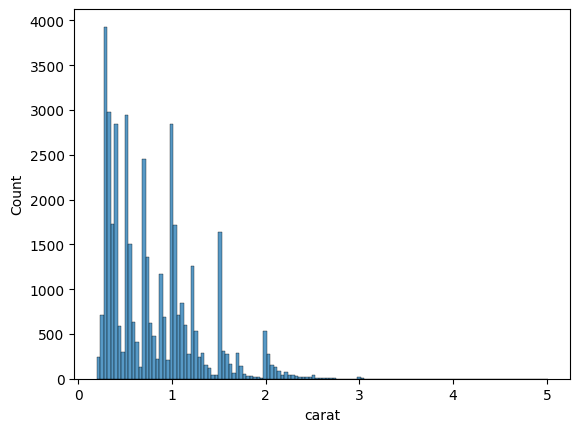

In [434]:
sns.histplot(x=df_train['carat']);

df_train['carat'] = min_max.fit_transform(df_train['carat'].values.reshape(-1, 1))

### Set up x and y for training data

In [435]:
X = df_train.iloc[:,:-1]

y= df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### A little visualization before model building 

In [436]:
corr_matrix = df_train.corr()
corr_matrix.style.background_gradient(cmap='Blues')

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.091685,-0.291000,-0.354075,0.029877,0.182316,0.976032,0.968603,0.948812,0.920101
cut,-0.091685,1.000000,0.009804,0.146027,-0.298663,-0.275239,-0.079195,-0.081378,-0.115246,-0.052553
color,-0.291000,0.009804,1.000000,-0.027502,-0.045797,-0.026552,-0.269683,-0.267296,-0.265799,-0.153779
clarity,-0.354075,0.146027,-0.027502,1.000000,-0.068549,-0.162996,-0.373931,-0.365906,-0.366564,-0.215906
depth,0.029877,-0.298663,-0.045797,-0.068549,1.000000,-0.292300,-0.023856,-0.027099,0.095304,0.002542
table,0.182316,-0.275239,-0.026552,-0.162996,-0.292300,1.000000,0.195966,0.188074,0.151454,0.158621
x,0.976032,-0.079195,-0.269683,-0.373931,-0.023856,0.195966,1.000000,0.991368,0.965504,0.958779
y,0.968603,-0.081378,-0.267296,-0.365906,-0.027099,0.188074,0.991368,1.000000,0.959607,0.953428
z,0.948812,-0.115246,-0.265799,-0.366564,0.095304,0.151454,0.965504,0.959607,1.000000,0.930799
price,0.920101,-0.052553,-0.153779,-0.215906,0.002542,0.158621,0.958779,0.953428,0.930799,1.000000


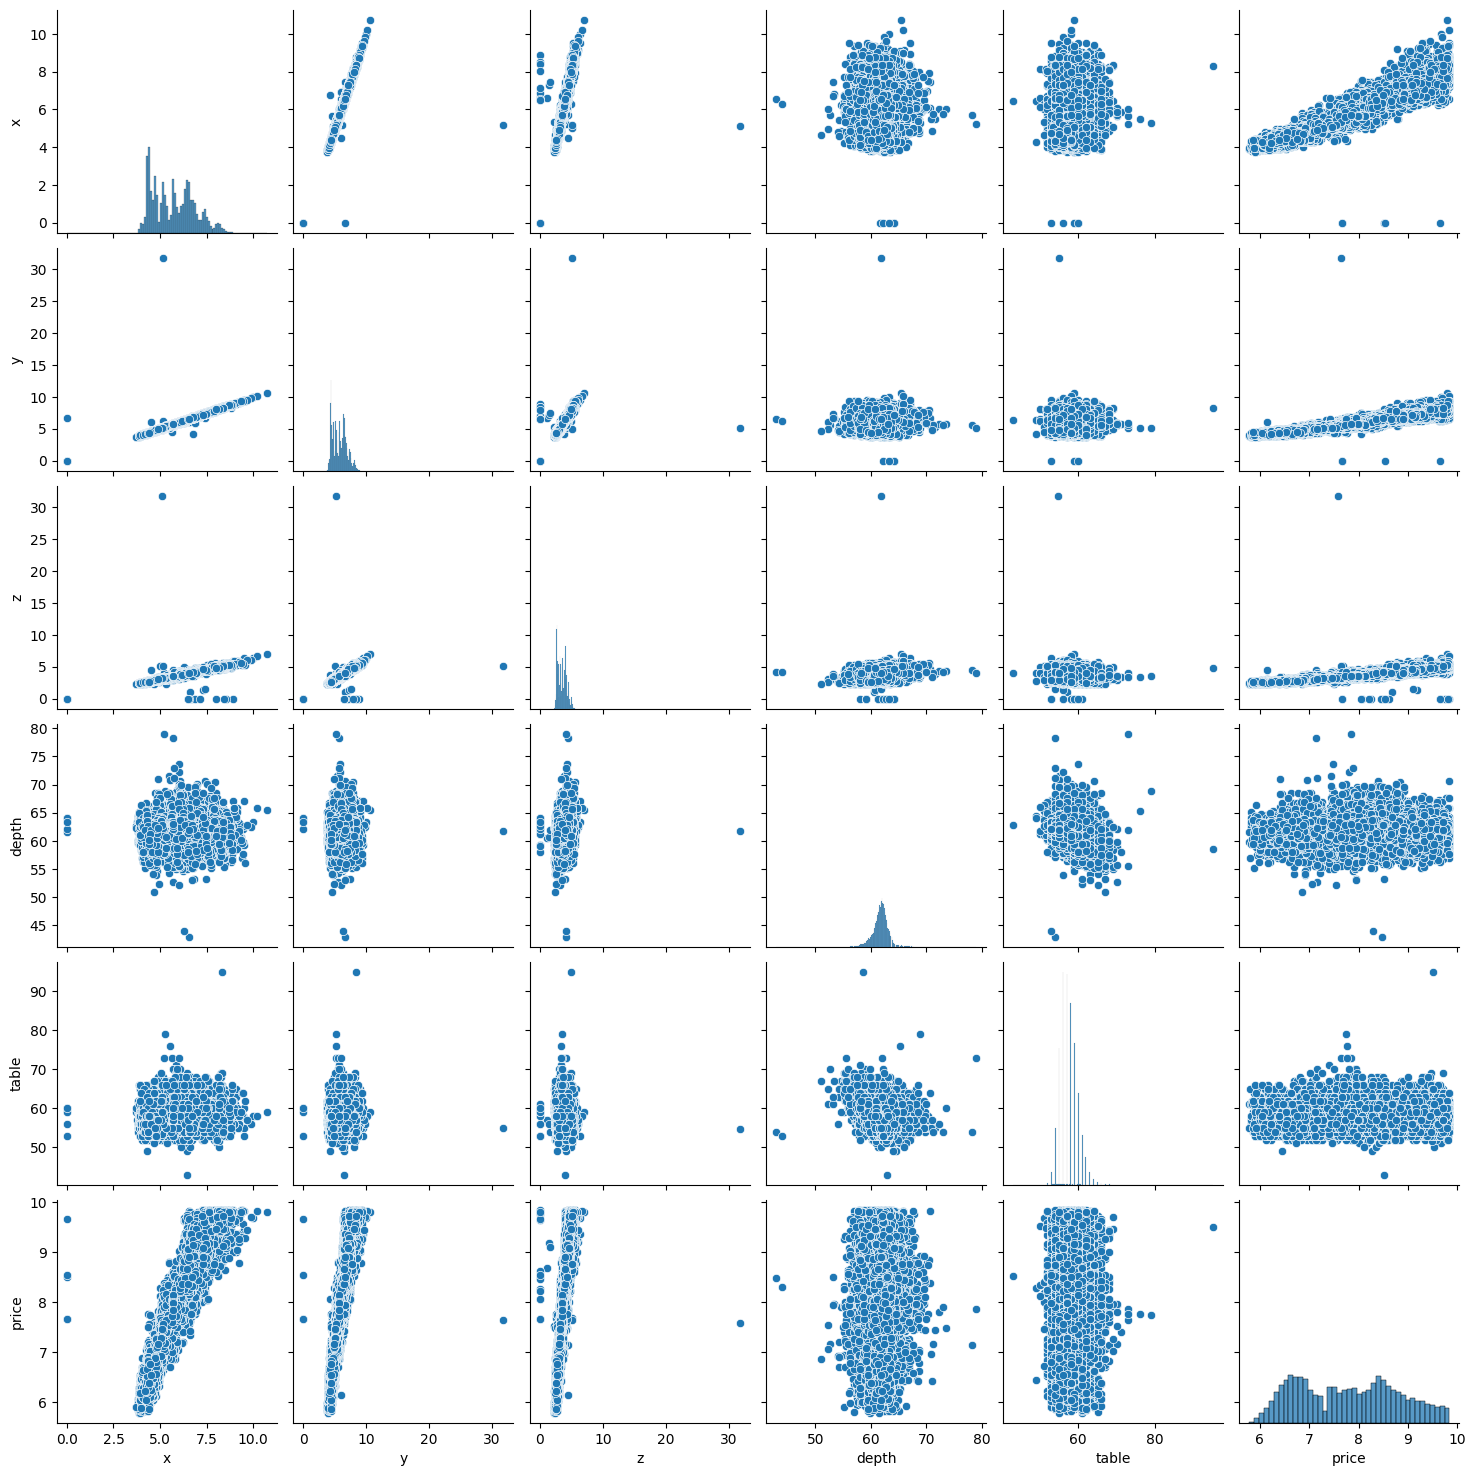

In [446]:
import matplotlib.pyplot as plt

sns.pairplot(data= df_train[['x','y','z', 'depth', 'table', 'price']]);

#plt.savefig('pairplot.png')

## Import Model Packages

In [439]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score as cvs

from sklearn.linear_model import LinearRegression as LinReg

from sklearn import metrics

from sklearn.feature_selection import RFE

import numpy as np

### Make dictionary of possible prediction models for Price

In [226]:
models = {
    "lr": LinReg(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR()
}

#### Fit all models in for loop 

In [227]:
for name, model in models.items():
    print("Training 🏋️‍:", name)
    model.fit(X_train, y_train)

Training 🏋️‍: lr
Training 🏋️‍: ridge
Training 🏋️‍: lasso
Training 🏋️‍: sgd
Training 🏋️‍: knn
Training 🏋️‍: grad
Training 🏋️‍: svr


### Follow the same process to make predictions from each model and get metrics

In [228]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------lr------
MAE -  0.11809258610188678
MSE -  0.04748293071195347
RMSE -  0.21790578402592592
R2 -  0.9532744152202803
------ridge------
MAE -  0.11862095875954723
MSE -  0.046699158347081056
RMSE -  0.2160998804883544
R2 -  0.9540456865283848
------lasso------
MAE -  0.8011467765777768
MSE -  0.8622545874933819
RMSE -  0.9285766459982622
R2 -  0.15149824946500778
------sgd------
MAE -  24001848.137144506
MSE -  1284695995951300.5
RMSE -  35842656.095095694
R2 -  -1264205279137861.8
------knn------
MAE -  0.12958336423186256
MSE -  0.031300887242615254
RMSE -  0.1769205676076562
R2 -  0.9691983574180041
------grad------
MAE -  0.08108873021508325
MSE -  0.011433133473608286
RMSE -  0.10692583164796188
R2 -  0.9887492233649249
------svr------
MAE -  0.1269398807120011
MSE -  0.04173597825743172
RMSE -  0.2042938527157186
R2 -  0.9589297046076974


### Remove weak models 

In [229]:
models = {
    "lr": LinReg(),
    "ridge": Ridge(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR()
}


# Grad is the best (R^2) at predicting data w a 0.2 split 


### Now try with different splits

In [230]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [231]:
for name, model in models.items():
    print("Training 🏋️‍:", name)
    model.fit(X_train, y_train)

Training 🏋️‍: lr
Training 🏋️‍: ridge
Training 🏋️‍: knn
Training 🏋️‍: grad
Training 🏋️‍: svr


In [232]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------lr------
MAE -  0.11978419526067
MSE -  0.024134999753375724
RMSE -  0.15535443268016438
R2 -  0.9769413318867892
------ridge------
MAE -  0.1204821828796042
MSE -  0.024418720863854163
RMSE -  0.15626490605332397
R2 -  0.97667026368749
------knn------
MAE -  0.12912364475201846
MSE -  0.029829056549678688
RMSE -  0.17271090454768248
R2 -  0.9715012089439514
------grad------
MAE -  0.08108290808360465
MSE -  0.011075730201942918
RMSE -  0.10524129513619128
R2 -  0.9894182063622211
------svr------
MAE -  0.12506487203409394
MSE -  0.02715043845656484
RMSE -  0.16477390101762124
R2 -  0.974060370586475



# it seems (a little bit) better to split the data by 0.15 (r^2= 0.9889437851359357) for the GradientBoostingRegressor() model 


In [233]:
scores = cvs(GradientBoostingRegressor(), X, y, scoring = "r2", cv=5)

In [234]:
np.mean(scores)

0.9888114264688749

### Use cvs to get better read of models, taking the mean of R2's after running 5 times


In [ ]:
for name, model in models.items():
    scores = cvs(model, X, y, scoring = "r2", cv=5)
    print("Model: ", name, "Score: ", np.mean(scores))

### Now that I have chosen the model (GradientBoostingRegressor), lets test with the removal lowest ranking categories 

In [201]:

estimator = GradientBoostingRegressor()
selector = RFE(estimator)
selector.fit(X_test, y_test)
selector.ranking_


array([1, 4, 3, 2, 5, 6, 1, 1, 1])

### Evaluate best model only including x,y,z and carat variables, according to the rankings


In [218]:

train_filt= df_train[['carat', 'x','y','z', 'price']]
test_filt= df_test[['carat', 'x','y','z']]

X_filt = train_filt.iloc[:,:-1]

y_filt = train_filt['price']

X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(X_filt, y_filt, test_size=0.15)



#### Including all models just in case

In [220]:

models = {
    "lr": LinReg(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR()
}

for name, model in models.items():
    print("Training 🏋️‍:", name)
    model.fit(X_train_filt, y_train_filt)


Training 🏋️‍: lr
Training 🏋️‍: ridge
Training 🏋️‍: lasso
Training 🏋️‍: sgd
Training 🏋️‍: knn
Training 🏋️‍: grad
Training 🏋️‍: svr


In [221]:
for name, model in models.items():
    y_pred_filt = model.predict(X_test_filt)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test_filt, y_pred_filt))
    print('MSE - ', metrics.mean_squared_error(y_test_filt, y_pred_filt))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test_filt, y_pred_filt)))
    print('R2 - ', metrics.r2_score(y_test_filt, y_pred_filt))

------lr------
MAE -  0.20558365526724295
MSE -  0.075896922093632
RMSE -  0.2754939601763204
R2 -  0.9266844982776177
------ridge------
MAE -  0.20587601608305128
MSE -  0.07589266126826139
RMSE -  0.275486227002842
R2 -  0.9266886141829954
------lasso------
MAE -  0.8146121263301211
MSE -  0.8851290322796129
RMSE -  0.9408129634946645
R2 -  0.14497614263502046
------sgd------
MAE -  0.21209710755851388
MSE -  0.07846052927759263
RMSE -  0.2801080671412243
R2 -  0.9242080849827635
------knn------
MAE -  0.1963178118306146
MSE -  0.06424539291481297
RMSE -  0.2534667491305575
R2 -  0.9379397334573031
------grad------
MAE -  0.18928855120908158
MSE -  0.057907242764511736
RMSE -  0.2406392377907471
R2 -  0.9440623092540905
------svr------
MAE -  0.19445653791718231
MSE -  0.06158877412906767
RMSE -  0.24817085672791572
R2 -  0.94050599482587


## R2 decreases for all values, but its more possible that model is not being over-fitted

In [222]:
print('R2 : ', metrics.r2_score(y_test_filt, y_pred_filt))
scores = cvs(models["grad"], X_filt, y_filt, scoring = "r2", cv=7)

R2 :  0.94050599482587


In [224]:
np.mean(scores)

0.9432860495987118

## Test models against test dataframe 

In [ ]:
X = df_train.iloc[:,:-1]

y= df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [267]:
GBR= GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)

In [382]:
y_pred

array([8.06575862, 6.76036627, 6.83568585, ..., 9.24724694, 7.06041544,
       9.64347673])

In [270]:
df_test
y_pred = GBR.predict(df_test)

In [273]:
df_test['price'] = y_pred # Adding the predicted price
df_for_submission = df_test[["id", "price"]] # Modifying for subnmission

In [275]:
df_for_submission
df_for_submission.to_csv("my_submission1.csv", index=False)


In [276]:
df1= pd.read_csv('my_submission1.csv')

## Improving the model 

In [331]:
# Evaluate best model only including x,y,z and carat variables, according to the rankings

train_filt= df_train[['carat', 'x','y','z', 'price']]
test_filt= df_test[['carat', 'x','y','z']]

X_filt = train_filt.iloc[:,:-1]

y_filt = train_filt['price']

X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(X_filt, y_filt, test_size=0.15)



In [341]:
GBR= GradientBoostingRegressor()
GBR.fit(X_train_filt, y_train_filt)
y_pred_filt = GBR.predict(df_test[['carat', 'x','y','z']])

array([8.03214086, 7.21621817, 6.57897709, ..., 9.21969649, 6.82454533,
       9.55180956])

In [343]:
df_test_rm= df_test[['carat', 'x','y','z', 'id']]

In [345]:
df_test_rm['price'] = y_pred_filt

/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [348]:
df_for_submission2= df_test_rm[['id', 'price']]

In [349]:
df_for_submission2.to_csv("my_submission2.csv", index=False)


## Filtering using ranking is worse, so will now attempt with no split

In [352]:
df_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [420]:
df_train_no_id= df_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price']]

In [ ]:
df_test_no_id= df_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price']]

In [391]:
X_train_id = df_train_no_id.iloc[:,:-1]

y_train_id= df_train_no_id['price']

df_test_id= df_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']]

In [392]:
GBR= GradientBoostingRegressor()
GBR.fit(X_train_id, y_train_id)
y_pred_id = GBR.predict(df_test_id)

In [395]:
y_pred_id

array([8.08504843, 6.7152679 , 6.834098  , ..., 9.26572276, 7.03560825,
       9.68266636])

In [401]:
df_test['price']= y_pred_id

In [402]:
df_for_submission3= df_test[['id', 'price']]

In [404]:
df_for_submission3.to_csv("my_submission3.csv", index=False)


## Barely made a difference without split and without including id: original model best

In [405]:
# Try decision tree classifyer 
from sklearn.tree import DecisionTreeClassifier

In [419]:
df_train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.170478,2,7,4,63.2,58.0,6.36,6.40,4.03,8.928
1,0.031185,3,3,6,61.0,57.0,4.54,4.57,2.77,6.477
2,0.022869,4,3,7,60.5,58.0,4.43,4.40,2.67,6.810
3,0.037422,4,6,5,61.4,56.0,4.66,4.69,2.87,6.824
4,0.299376,4,4,6,61.8,56.0,7.59,7.60,4.69,9.776
...,...,...,...,...,...,...,...,...,...,...
40450,0.207900,4,4,6,62.2,55.0,6.77,6.81,4.23,9.149
40451,0.270270,2,3,5,64.2,56.0,7.30,7.09,4.62,9.077
40452,0.178794,4,6,4,61.9,55.0,6.54,6.58,4.06,8.892
40453,0.022869,4,7,2,60.1,58.0,4.40,4.38,2.64,6.385


In [ ]:
X = df_train.iloc[:,:-1]

y= df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

